In [1]:
# Preprocess CSV
import pandas as pd
import matplotlib.pyplot as plt

CSV_PATH_I7 = "logs/i7-7700_ex11.csv"
CSV_PATH_XS = "logs/xs-4114_ex11.csv"
df_i7 = pd.read_csv(CSV_PATH_I7)
df_xs = pd.read_csv(CSV_PATH_XS)

# Data cleaning
df_i7["threads"] = pd.to_numeric(df_i7["threads"], errors="coerce")
df_i7["value"]   = pd.to_numeric(df_i7["value"], errors="coerce")
df_i7["metric"]  = pd.to_numeric(df_i7["metric"], errors="coerce")
df_i7["unit"]    = df_i7["unit"].astype(str).str.strip()
df_i7["event"]   = df_i7["event"].astype(str).str.strip()
df_i7["metric_name"] = df_i7["metric_name"].astype(str).str.strip()

df_xs["threads"] = pd.to_numeric(df_xs["threads"], errors="coerce")
df_xs["value"]   = pd.to_numeric(df_xs["value"], errors="coerce")
df_xs["metric"]  = pd.to_numeric(df_xs["metric"], errors="coerce")
df_xs["unit"]    = df_xs["unit"].astype(str).str.strip()
df_xs["event"]   = df_xs["event"].astype(str).str.strip()
df_xs["metric_name"] = df_xs["metric_name"].astype(str).str.strip()

display(df_i7.head(10))
display(df_xs.head(10))

,jobid,size,threads,value,unit,event,percent_running,raw,percent_enabled,metric,metric_unit,metric_name
0,784188,1300,1,58118462092,nan,cycles,0.30%,13867089916,100.0,NaN,NaN,nan
1,784188,1300,1,130070976453,nan,instructions,0.00%,13867089916,100.0,2.24,insn per cycle,nan
2,784188,1300,1,13955504416,ns,duration_time,0.33%,13877542056,100.0,NaN,NaN,nan
3,784188,1300,1,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,13867089916,100.0,NaN,NaN,nan
4,784188,1300,2,60612066420,nan,cycles,0.65%,14773933398,100.0,NaN,NaN,nan
5,784188,1300,2,130076058446,nan,instructions,0.00%,14773933398,100.0,2.15,insn per cycle,nan
6,784188,1300,2,7534031616,ns,duration_time,1.60%,7418672287,100.0,NaN,NaN,nan
7,784188,1300,2,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,14773933398,100.0,NaN,NaN,nan
8,784188,1300,3,60003254862,nan,cycles,0.36%,14830159059,100.0,NaN,NaN,nan
9,784188,1300,3,130079717380,nan,instructions,0.00%,14830159059,100.0,2.17,insn per cycle,nan


,jobid,size,threads,value,unit,event,percent_running,raw,percent_enabled,metric,metric_unit,metric_name
0,784190,1300,1,56031905707,nan,cycles,0.06%,18943395194,100.0,NaN,NaN,nan
1,784190,1300,1,130104005024,nan,instructions,0.00%,18943395194,100.0,2.32,insn per cycle,nan
2,784190,1300,1,18938311219,ns,duration_time,0.15%,18950827714,100.0,NaN,NaN,nan
3,784190,1300,1,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,18943395194,100.0,NaN,NaN,nan
4,784190,1300,2,56025834761,nan,cycles,0.05%,20048332718,100.0,NaN,NaN,nan
5,784190,1300,2,130108043239,nan,instructions,0.00%,20048332718,100.0,2.32,insn per cycle,nan
6,784190,1300,2,10058955154,ns,duration_time,0.14%,10075004822,100.0,NaN,NaN,nan
7,784190,1300,2,4394000001,nan,fp_arith_inst_retired.scalar_single,0.00%,20048332718,100.0,NaN,NaN,nan
8,784190,1300,3,56027899966,nan,cycles,0.14%,20065301724,100.0,NaN,NaN,nan
9,784190,1300,3,130110623314,nan,instructions,0.00%,20065301724,100.0,2.32,insn per cycle,nan


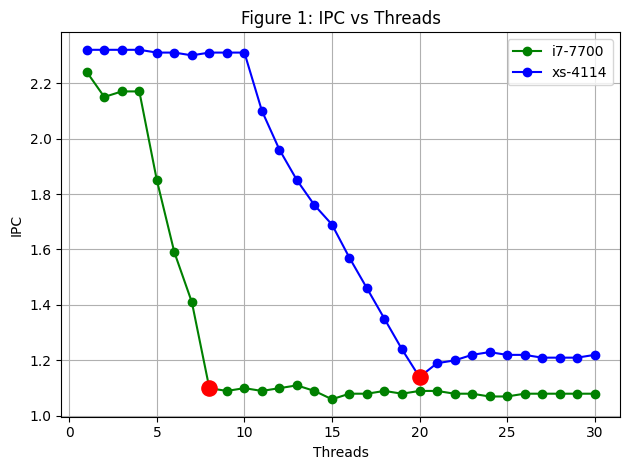

In [2]:
def generate_ipc_graph(df: pd.DataFrame) -> pd.DataFrame:
    # display(df)
    ipc_mask = df["event"].str.contains("instructions", na=False) 
    ipc_df = df[ipc_mask].copy()
    # display(ipc_df)

    ipc_data = (ipc_df[["threads","metric"]]
              .dropna()
              .drop_duplicates(subset=["threads"])
              .sort_values("threads")
              .rename(columns={"metric":"ipc"}))

    return ipc_data
ipc_data_i7 = generate_ipc_graph(df_i7)
ipc_data_xs = generate_ipc_graph(df_xs)
plt.figure()
plt.plot(ipc_data_i7["threads"], ipc_data_i7["ipc"], marker="o", color="green")
plt.plot(ipc_data_xs["threads"], ipc_data_xs["ipc"], marker="o", color="blue")
plt.legend(["i7-7700", "xs-4114"])
plt.xlabel("Threads")
plt.ylabel("IPC")
plt.title("Figure 1: IPC vs Threads")
plt.grid(True)
plt.tight_layout()

plt.scatter(8,  ipc_data_i7.set_index('threads').loc[8,  'ipc'], s=120, c='red', zorder=5)
plt.scatter(20, ipc_data_xs.set_index('threads').loc[20, 'ipc'], s=120, c='red', zorder=5)

plt.show()


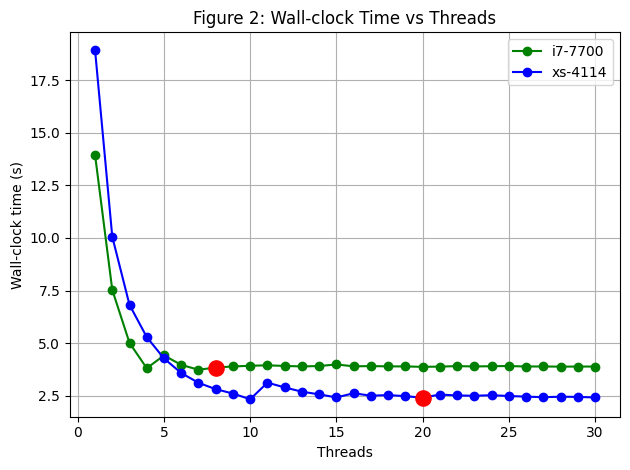

In [3]:
def generate_wallclock_graph(df: pd.DataFrame) -> pd.DataFrame:
    time_mask = (df["event"].str.contains("duration_time", na=False))
    time_df = df[time_mask].copy()
    time_df["seconds"] = time_df["value"] / 1e9

    # display(time_df.head(5))

    time_data = time_df.dropna(subset=["threads","seconds"])
    return time_data

time_data_i7 = generate_wallclock_graph(df_i7)
time_data_xs = generate_wallclock_graph(df_xs)
plt.figure()
plt.plot(time_data_i7["threads"], time_data_i7["seconds"], marker="o", color='green')
plt.plot(time_data_xs["threads"], time_data_xs["seconds"], marker="o", color='blue')
plt.legend(["i7-7700", "xs-4114"])
plt.xlabel("Threads")
plt.ylabel("Wall-clock time (s)")
plt.title("Figure 2: Wall-clock Time vs Threads")
plt.grid(True)
plt.tight_layout()

plt.scatter(8,  time_data_i7.set_index('threads').loc[8,  'seconds'], s=120, c='red', zorder=5)
plt.scatter(20, time_data_xs.set_index('threads').loc[20, 'seconds'], s=120, c='red', zorder=5)

plt.show()

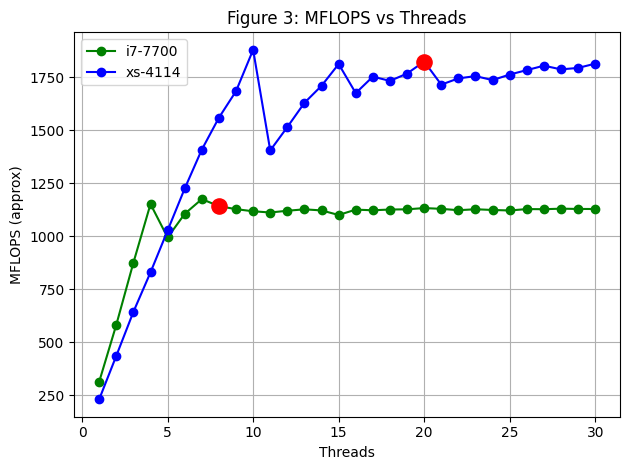

In [4]:
def generate_mflops_graph(df: pd.DataFrame) -> pd.DataFrame:
    # FP instruction counts (proxy for FLOPs)
    fp = df[df["event"].str.contains("fp_arith_inst_retired", case=False, na=False)][
        ["jobid","size","threads","value"]
    ].rename(columns={"value": "fp"})

    # Duration (ns) -> seconds
    tm = df[
        df["event"].str.contains("duration_time", case=False, na=False)
        & df["unit"].astype(str).str.lower().eq("ns")
    ][["jobid","size","threads","value"]].rename(columns={"value": "t_ns"})

    # Pair per-run rows and compute MFLOPS
    m = fp.merge(tm, on=["jobid","size","threads"], how="inner")
    m["mflops"] = (m["fp"] / (m["t_ns"] / 1e9)) / 1e6

    # one row per run, ready to plot
    return m[["threads","mflops"]].sort_values("threads")

mflops_i7 = generate_mflops_graph(df_i7)
mflops_xs = generate_mflops_graph(df_xs)

plt.figure()
plt.plot(mflops_i7["threads"], mflops_i7["mflops"], marker="o", color='green')
plt.plot(mflops_xs["threads"], mflops_xs["mflops"], marker="o", color='blue')
plt.legend(["i7-7700", "xs-4114"])
plt.xlabel("Threads"); plt.ylabel("MFLOPS (approx)")
plt.title("Figure 3: MFLOPS vs Threads")
plt.grid(True) 
plt.tight_layout()

plt.scatter(8,  mflops_i7.set_index('threads').loc[8,  'mflops'], s=120, c='red', zorder=5)
plt.scatter(20, mflops_xs.set_index('threads').loc[20, 'mflops'], s=120, c='red', zorder=5)

plt.show()
